## CNN tutorial

#### CNN cifar 10 tutorial

In [71]:
import os
import numpy
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.datasets import cifar10
from keras import optimizers

-----

- config

In [80]:
batch_size = 128
num_classes = 10
epochs = 5
validation_split = 0.2
lr = 0.01
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

-----

- data import

In [73]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

x_train /= 255
x_test /= 255

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [74]:
def visualize_image(X, Y):
    rgb = X[0]
    img = rgb.reshape(3,32,32).transpose([1, 2, 0])
    plt.imshow(img)
    plt.show()

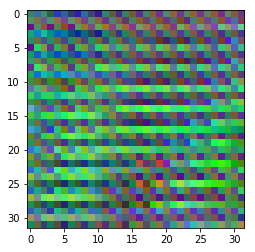

In [75]:
visualize_image(x_train, y_train)

-----

In [79]:
model = Sequential()

# 3X3 사이즈, input channel 숫자와 동일한 channel의 필터가 32개
# padding 'same' : input size와 output size가 동일하도록 padding, 'valid' : padding 없음
# 첫 conv layer에만 input size 기입
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(32, (3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2)) # 2X2 strides=2 풀링 layer
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.25))

# flatten한 뒤, fully-connected layer와 분류 activation 추가
model.add(Flatten())
model.add(Dense(512, activation='relu')) # output size 512
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax')) # output size 10

adam = optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [81]:
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split)
performance_test = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test Loss and Accuracy ->', performance_test)

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 164s 4ms/step - loss: 14.5137 - acc: 0.0994 - val_loss: 14.4837 - val_acc: 0.1014
Epoch 2/5
40000/40000 [==============================] - 176s 4ms/step - loss: 14.5119 - acc: 0.0996 - val_loss: 14.4837 - val_acc: 0.1014
Epoch 3/5
40000/40000 [==============================] - 193s 5ms/step - loss: 14.5119 - acc: 0.0996 - val_loss: 14.4837 - val_acc: 0.1014
Epoch 4/5
40000/40000 [==============================] - 175s 4ms/step - loss: 14.5119 - acc: 0.0996 - val_loss: 14.4837 - val_acc: 0.1014
Epoch 5/5
10000/10000 [==============================] - 10s 1ms/step
Test Loss and Accuracy -> [14.50628896636963, 0.1]
